In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [3]:
DATADIR_TRAIN = "../train_bird"
DATADIR_VALID = "../validation_bird"
DATADIR_TEST = "../test_bird"
CATEGORIES = ["bird", "duck"]

In [4]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("../train_cancer1",
                                          target_size=(512,512),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
validation_dataset = test.flow_from_directory("../validation_cancer1",
                                          target_size=(512,512),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 454 images belonging to 2 classes.
Found 184 images belonging to 2 classes.


In [5]:
validation_dataset.class_indices

{'benign': 0, 'malignant': 1}

In [7]:
train_dataset.class_indices

{'benign': 0, 'malignant': 1}

In [8]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(512,512,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
#steps_per_epoch = train_imagesize/batch_size

model.fit(train_dataset,
         epochs = 5, batch_size=10,
         validation_data = validation_dataset  
         )

Epoch 1/5
15/15 [==============================] - 83s 6s/step - loss: 0.6424 - accuracy: 0.6740 - val_loss: 0.6602 - val_accuracy: 0.6141
Epoch 2/5
15/15 [==============================] - 85s 6s/step - loss: 0.6318 - accuracy: 0.6145 - val_loss: 0.6384 - val_accuracy: 0.6033
Epoch 3/5
15/15 [==============================] - 95s 6s/step - loss: 0.5814 - accuracy: 0.7203 - val_loss: 0.5987 - val_accuracy: 0.6848
Epoch 4/5
15/15 [==============================] - 100s 7s/step - loss: 0.5428 - accuracy: 0.7401 - val_loss: 0.5136 - val_accuracy: 0.7717
Epoch 5/5
15/15 [==============================] - 93s 6s/step - loss: 0.5895 - accuracy: 0.7401 - val_loss: 0.9162 - val_accuracy: 0.5109


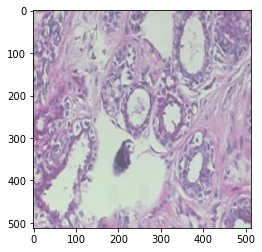

Malignant


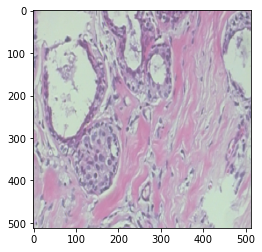

Malignant


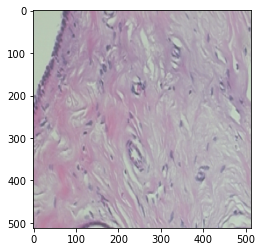

Malignant


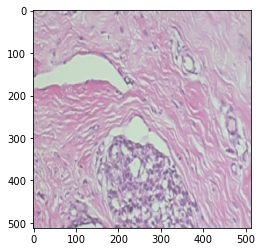

Malignant


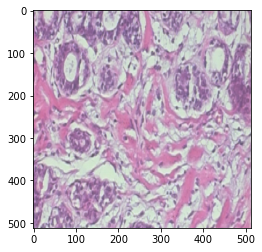

Malignant


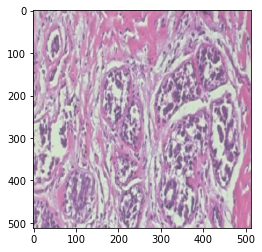

Malignant


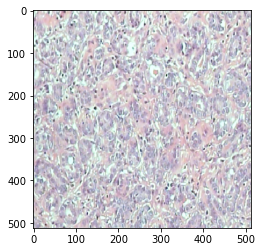

Malignant


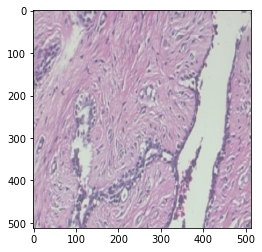

Malignant


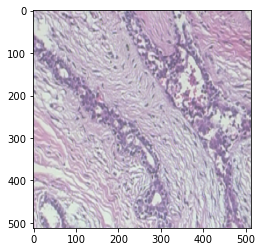

Malignant


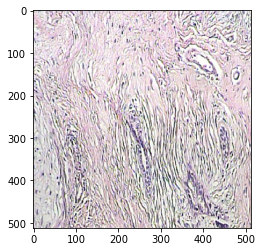

Malignant


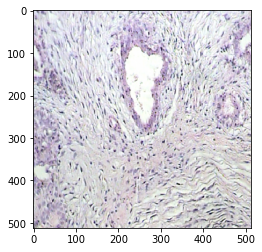

Malignant


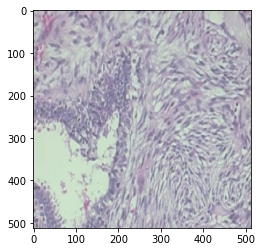

Malignant


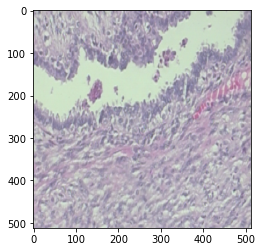

Malignant


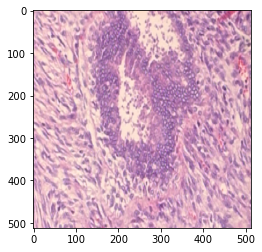

Malignant


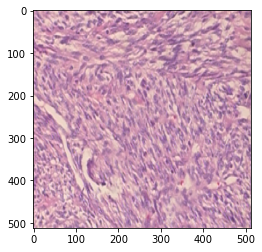

Malignant


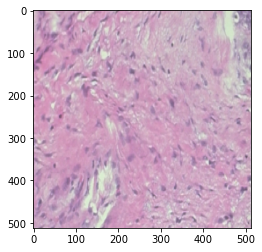

Malignant


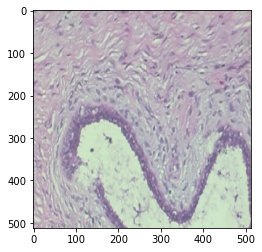

Malignant


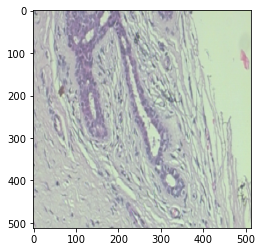

Malignant


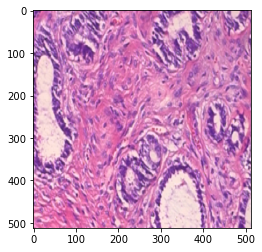

Malignant


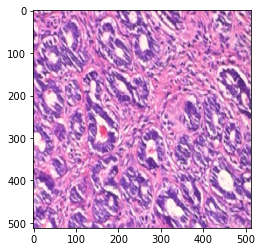

Malignant


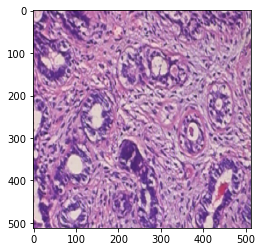

Malignant


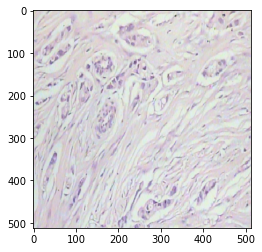

Malignant


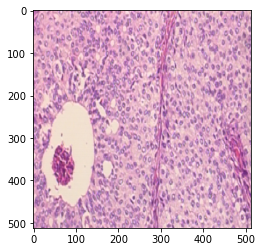

Malignant


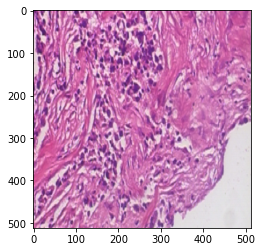

Malignant


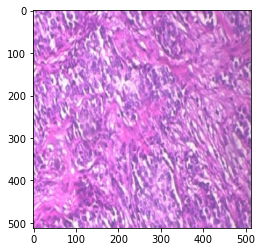

Malignant


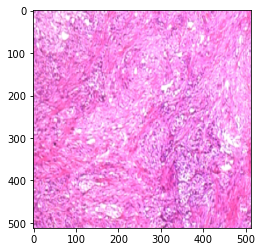

Malignant


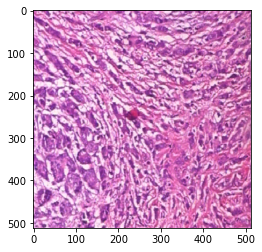

Malignant


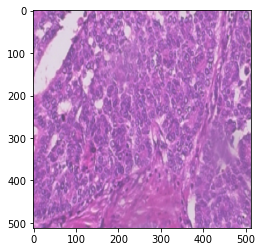

Malignant


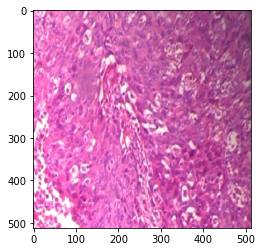

Malignant


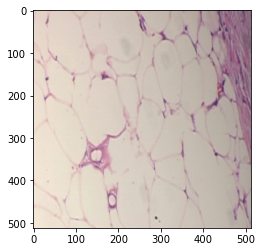

Malignant


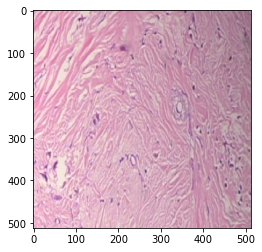

Malignant


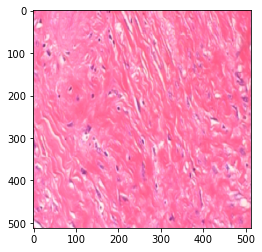

Malignant


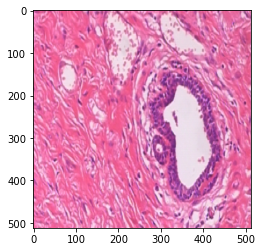

Malignant


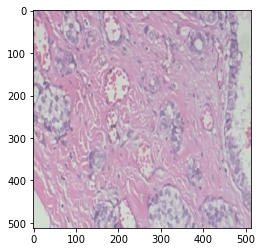

Malignant


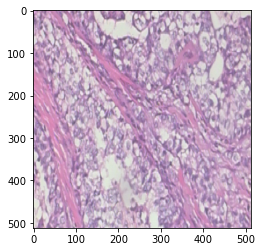

Malignant


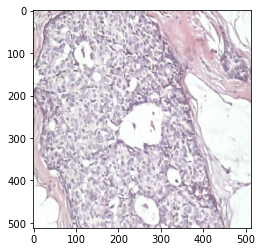

Malignant


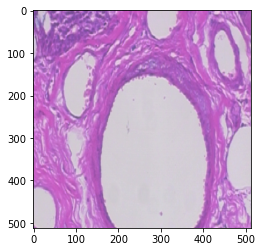

Malignant


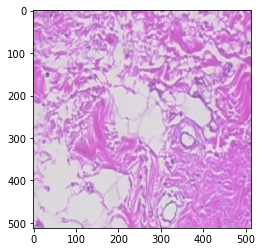

Malignant


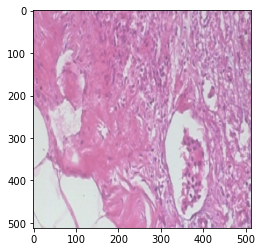

Malignant


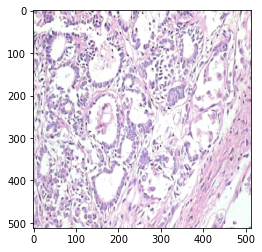

Malignant


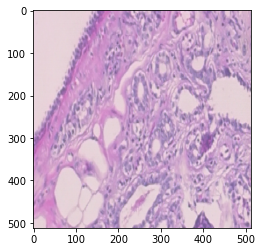

Malignant


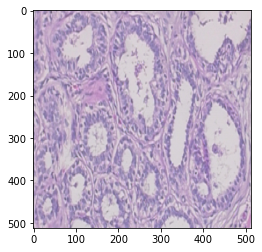

Malignant


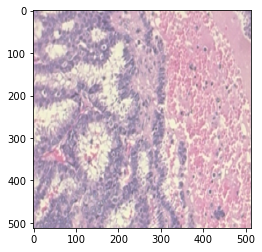

Malignant


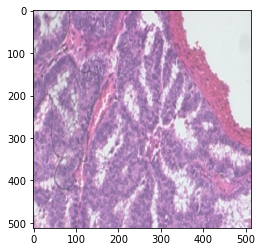

Malignant
Benign: 0, Malignant: 44


In [14]:
# Manually Predicting 
test_path = '../test_benign_malignant'
benign=0
malignant=0
for i in os.listdir(test_path):
    img = image.load_img(test_path + "//" +i, target_size=(512,512,3))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        benign +=1
        print('Benign')
    else:
        malignant +=1
        print('Malignant')
print(f'Benign: {benign}, Malignant: {malignant}')

def predictImage(filename):
    img1 = image.load_img(filename,target_size=(224,224))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("Duck",fontsize=20)
        
    
    elif val == 0:
        
        plt.xlabel("Bird",fontsize=20)

    

predictImage(file_directory)